In [1]:
!python -V

Python 3.9.23


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pickle

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error

In [6]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc-taxi-experiment")

<Experiment: artifact_location='/workspaces/mlops-zoomcamp-exercises/02-experiment-tracking/mlruns/1', creation_time=1768915942617, experiment_id='1', last_update_time=1768915942617, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [7]:
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')
df['duration']=df.lpep_dropoff_datetime-df.lpep_pickup_datetime
df.duration=df.duration.apply(lambda td:td.total_seconds()/60)
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
categorical=['PULocationID','DOLocationID']
df[categorical]=df[categorical].astype(str)
numerical = ['trip_distance']



df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


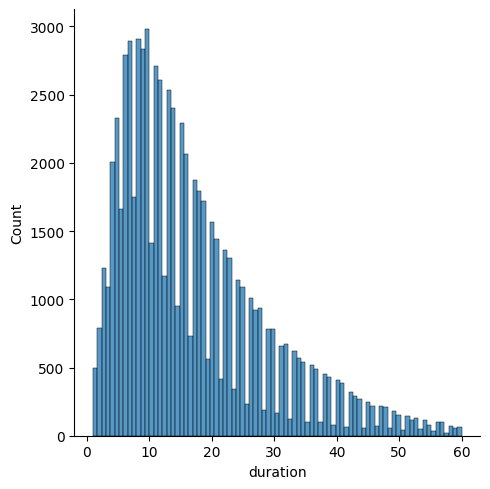

In [9]:
sns.displot(df.duration)
plt.show()

In [8]:
import pandas as pd

def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
    else:
        print("Unsupported file format")
        return None

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [9]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')

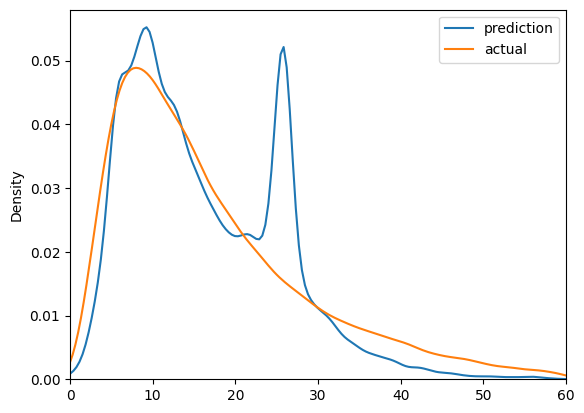

In [20]:
sns.kdeplot(y_pred, label='prediction')
sns.kdeplot(y_train, label='actual')

plt.xlim(0, 60)
plt.legend()
plt.show()

In [8]:
len(df_train),len(df_val)

(73908, 61921)

In [10]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [11]:
categorical=['PU_DO']  #['PULocationID','DOLocationID']
numerical = ['trip_distance']

dv=DictVectorizer()

train_dicts=df_train[categorical+numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)

val_dicts=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)

In [12]:
target='duration'
y_train=df_train[target].values
y_val=df_val[target].values

In [12]:
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_val)

root_mean_squared_error(y_val,y_pred)


7.758715208009878

In [13]:
with mlflow.start_run():

    mlflow.set_tag('developer','nick')

    mlflow.log_param("train-data-path", "data/green_tripdata_2021-01.parquet")
    mlflow.log_param("val-data-path", "data/green_tripdata_2021-02.parquet")
    alpha=0.01
    mlflow.log_param("alpha",alpha)

    lr=Lasso(alpha=alpha)
    lr.fit(X_train,y_train)


    y_pred = lr.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    mlflow.log_metric("rmse", rmse)

In [22]:
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_train)
root_mean_squared_error(y_train,y_pred)


5.699564118198926

In [23]:
lr=Ridge()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_val)

root_mean_squared_error(y_val,y_pred)

7.70373515548786

In [24]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [11]:
import xgboost as xgb


In [12]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [13]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [14]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = root_mean_squared_error(y_val, y_pred)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [15]:



search_space = {
    # Μειώνουμε το βάθος από 100 σε 20. Πάνω από 15-20 σπάνια βοηθάει και τρώει όλη τη RAM.
    'max_depth': scope.int(hp.quniform('max_depth', 4, 20, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=30, # Μειώνουμε τις δοκιμές σε 30. Είναι υπεραρκετές για να βρούμε καλό μοντέλο.
    trials=Trials()
)

  0%|          | 0/30 [00:00<?, ?trial/s, best loss=?]

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:00:24] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:7.07407                           
[1]	validation-rmse:6.76448                           
[2]	validation-rmse:6.72505                           
[3]	validation-rmse:6.71092                           
[4]	validation-rmse:6.69733                           
[5]	validation-rmse:6.69280                           
[6]	validation-rmse:6.68898                           
[7]	validation-rmse:6.68620                           
[8]	validation-rmse:6.68362                           
[9]	validation-rmse:6.68109                           
[10]	validation-rmse:6.67861                          
[11]	validation-rmse:6.67581                          
[12]	validation-rmse:6.67335                          
[13]	validation-rmse:6.67161                          
[14]	validation-rmse:6.66988                          
[15]	validation-rmse:6.66773                          
[16]	validation-rmse:6.66333                          
[17]	validation-rmse:6.66050                          
[18]	valid

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:01:36] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:10.46808                                                   
[2]	validation-rmse:9.80054                                                    
[3]	validation-rmse:9.24563                                                    
[4]	validation-rmse:8.78642                                                    
[5]	validation-rmse:8.40892                                                    
[6]	validation-rmse:8.09860                                                    
[7]	validation-rmse:7.84566                                                    
[8]	validation-rmse:7.63849                                                    
[9]	validation-rmse:7.47079                                                    
[10]	validation-rmse:7.33464                                                   
[11]	validation-rmse:7.22499                                                   
[12]	validation-rmse:7.13636                                                   
[13]	validation-rmse:7.06257            

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:03:07] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:6.83679                                                    
[3]	validation-rmse:6.80080                                                    
[4]	validation-rmse:6.78460                                                    
[5]	validation-rmse:6.77912                                                    
[6]	validation-rmse:6.76890                                                    
[7]	validation-rmse:6.76054                                                    
[8]	validation-rmse:6.75484                                                    
[9]	validation-rmse:6.74743                                                    
[10]	validation-rmse:6.74137                                                   
[11]	validation-rmse:6.73651                                                   
[12]	validation-rmse:6.73228                                                   
[13]	validation-rmse:6.72748                                                   
[14]	validation-rmse:6.72344            

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:04:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:7.73262                                                    
[2]	validation-rmse:7.16960                                                    
[3]	validation-rmse:6.94017                                                    
[4]	validation-rmse:6.84235                                                    
[5]	validation-rmse:6.79286                                                    
[6]	validation-rmse:6.76483                                                    
[7]	validation-rmse:6.75032                                                    
[8]	validation-rmse:6.74473                                                    
[9]	validation-rmse:6.74049                                                    
[10]	validation-rmse:6.73579                                                   
[11]	validation-rmse:6.73218                                                   
[12]	validation-rmse:6.72834                                                   
[13]	validation-rmse:6.72456            

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:05:31] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:8.71465                                                    
[1]	validation-rmse:7.41860                                                    
[2]	validation-rmse:6.97823                                                    
[3]	validation-rmse:6.81450                                                    
[4]	validation-rmse:6.75522                                                    
[5]	validation-rmse:6.72226                                                    
[6]	validation-rmse:6.70704                                                    
[7]	validation-rmse:6.69903                                                    
[8]	validation-rmse:6.69483                                                    
[9]	validation-rmse:6.69091                                                    
[10]	validation-rmse:6.68897                                                   
[11]	validation-rmse:6.68518                                                   
[12]	validation-rmse:6.67939            

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:06:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:7.99842                                                    
[2]	validation-rmse:7.33553                                                    
[3]	validation-rmse:7.02318                                                    
[4]	validation-rmse:6.87522                                                    
[5]	validation-rmse:6.79665                                                    
[6]	validation-rmse:6.75581                                                    
[7]	validation-rmse:6.73243                                                    
[8]	validation-rmse:6.71798                                                    
[9]	validation-rmse:6.70998                                                    
[10]	validation-rmse:6.70512                                                   
[11]	validation-rmse:6.69893                                                   
[12]	validation-rmse:6.69526                                                   
[13]	validation-rmse:6.68791            

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:08:33] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:11.21703                                                   
[2]	validation-rmse:10.78251                                                   
[3]	validation-rmse:10.38635                                                   
[4]	validation-rmse:10.02570                                                   
[5]	validation-rmse:9.69844                                                    
[6]	validation-rmse:9.40141                                                    
[7]	validation-rmse:9.13227                                                    
[8]	validation-rmse:8.88898                                                    
[9]	validation-rmse:8.66955                                                    
[10]	validation-rmse:8.47100                                                   
[11]	validation-rmse:8.29291                                                   
[12]	validation-rmse:8.13266                                                   
[13]	validation-rmse:7.98807            

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:10:07] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:7.60533                                                    
[1]	validation-rmse:6.84755                                                    
[2]	validation-rmse:6.70797                                                    
[3]	validation-rmse:6.67515                                                    
[4]	validation-rmse:6.66568                                                    
[5]	validation-rmse:6.65811                                                    
[6]	validation-rmse:6.65513                                                    
[7]	validation-rmse:6.64874                                                    
[8]	validation-rmse:6.63919                                                    
[9]	validation-rmse:6.63109                                                    
[10]	validation-rmse:6.62489                                                   
[11]	validation-rmse:6.61993                                                   
[12]	validation-rmse:6.61227            

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:10:57] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.55468                                                   
[1]	validation-rmse:9.36009                                                    
[2]	validation-rmse:8.51593                                                    
[3]	validation-rmse:7.93033                                                    
[4]	validation-rmse:7.52610                                                    
[5]	validation-rmse:7.25301                                                    
[6]	validation-rmse:7.06497                                                    
[7]	validation-rmse:6.93606                                                    
[8]	validation-rmse:6.84803                                                    
[9]	validation-rmse:6.78590                                                    
[10]	validation-rmse:6.74143                                                   
[11]	validation-rmse:6.70852                                                   
[12]	validation-rmse:6.68549            

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:12:48] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.37071                                                   
[1]	validation-rmse:10.64638                                                   
[2]	validation-rmse:10.02654                                                   
[3]	validation-rmse:9.49874                                                    
[4]	validation-rmse:9.05140                                                    
[5]	validation-rmse:8.67349                                                    
[6]	validation-rmse:8.35610                                                    
[7]	validation-rmse:8.09063                                                    
[8]	validation-rmse:7.86861                                                    
[9]	validation-rmse:7.68395                                                    
[10]	validation-rmse:7.53049                                                   
[11]	validation-rmse:7.40221                                                   
[12]	validation-rmse:7.29606            

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:14:46] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:7.17928                                                     
[3]	validation-rmse:6.94889                                                     
[4]	validation-rmse:6.84728                                                     
[5]	validation-rmse:6.79388                                                     
[6]	validation-rmse:6.76860                                                     
[7]	validation-rmse:6.75467                                                     
[8]	validation-rmse:6.74824                                                     
[9]	validation-rmse:6.74448                                                     
[10]	validation-rmse:6.74046                                                    
[11]	validation-rmse:6.73564                                                    
[12]	validation-rmse:6.73204                                                    
[13]	validation-rmse:6.72861                                                    
[14]	validation-rmse:6.72500

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:16:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:7.85354                                                     
[1]	validation-rmse:6.94829                                                     
[2]	validation-rmse:6.75466                                                     
[3]	validation-rmse:6.70370                                                     
[4]	validation-rmse:6.67859                                                     
[5]	validation-rmse:6.67037                                                     
[6]	validation-rmse:6.66497                                                     
[7]	validation-rmse:6.65915                                                     
[8]	validation-rmse:6.65608                                                     
[9]	validation-rmse:6.65078                                                     
[10]	validation-rmse:6.64694                                                    
[11]	validation-rmse:6.64315                                                    
[12]	validation-rmse:6.63965

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:17:41] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.75183                                                     
[1]	validation-rmse:8.34744                                                     
[2]	validation-rmse:7.58458                                                     
[3]	validation-rmse:7.17601                                                     
[4]	validation-rmse:6.96102                                                     
[5]	validation-rmse:6.83887                                                     
[6]	validation-rmse:6.77198                                                     
[7]	validation-rmse:6.73273                                                     
[8]	validation-rmse:6.70871                                                     
[9]	validation-rmse:6.69340                                                     
[10]	validation-rmse:6.68360                                                    
[11]	validation-rmse:6.67665                                                    
[12]	validation-rmse:6.67261

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:19:06] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:8.36433                                                     
[1]	validation-rmse:7.18342                                                     
[2]	validation-rmse:6.83595                                                     
[3]	validation-rmse:6.72257                                                     
[4]	validation-rmse:6.68035                                                     
[5]	validation-rmse:6.65968                                                     
[6]	validation-rmse:6.65525                                                     
[7]	validation-rmse:6.64928                                                     
[8]	validation-rmse:6.64246                                                     
[9]	validation-rmse:6.63421                                                     
[10]	validation-rmse:6.63028                                                    
[11]	validation-rmse:6.62409                                                    
[12]	validation-rmse:6.62013

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:20:04] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:10.77026                                                    
[3]	validation-rmse:10.37184                                                    
[4]	validation-rmse:10.01075                                                    
[5]	validation-rmse:9.68315                                                     
[6]	validation-rmse:9.38647                                                     
[7]	validation-rmse:9.11786                                                     
[8]	validation-rmse:8.87597                                                     
[9]	validation-rmse:8.65781                                                     
[10]	validation-rmse:8.46141                                                    
[11]	validation-rmse:8.28465                                                    
[12]	validation-rmse:8.12596                                                    
[13]	validation-rmse:7.98459                                                    
[14]	validation-rmse:7.85765

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:21:23] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.45853                                                    
[1]	validation-rmse:10.79822                                                    
[2]	validation-rmse:10.22170                                                    
[3]	validation-rmse:9.72093                                                     
[4]	validation-rmse:9.28820                                                     
[5]	validation-rmse:8.91448                                                     
[6]	validation-rmse:8.59261                                                     
[7]	validation-rmse:8.31706                                                     
[8]	validation-rmse:8.08118                                                     
[9]	validation-rmse:7.88039                                                     
[10]	validation-rmse:7.70881                                                    
[11]	validation-rmse:7.56325                                                    
[12]	validation-rmse:7.43965

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:22:49] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.75962                                                    
[1]	validation-rmse:9.65991                                                     
[2]	validation-rmse:8.83647                                                     
[3]	validation-rmse:8.23277                                                     
[4]	validation-rmse:7.79109                                                     
[5]	validation-rmse:7.47267                                                     
[6]	validation-rmse:7.24286                                                     
[7]	validation-rmse:7.07875                                                     
[8]	validation-rmse:6.95954                                                     
[9]	validation-rmse:6.87332                                                     
[10]	validation-rmse:6.80878                                                    
[11]	validation-rmse:6.76096                                                    
[12]	validation-rmse:6.72550

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:24:46] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.04069                                                    
[1]	validation-rmse:10.09702                                                    
[2]	validation-rmse:9.34381                                                     
[3]	validation-rmse:8.75022                                                     
[4]	validation-rmse:8.28312                                                     
[5]	validation-rmse:7.92137                                                     
[6]	validation-rmse:7.63749                                                     
[7]	validation-rmse:7.41917                                                     
[8]	validation-rmse:7.25157                                                     
[9]	validation-rmse:7.12202                                                     
[10]	validation-rmse:7.02171                                                    
[11]	validation-rmse:6.94343                                                    
[12]	validation-rmse:6.88322

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:26:30] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.63539                                                    
[1]	validation-rmse:9.47981                                                     
[2]	validation-rmse:8.64968                                                     
[3]	validation-rmse:8.06294                                                     
[4]	validation-rmse:7.65391                                                     
[5]	validation-rmse:7.36890                                                     
[6]	validation-rmse:7.17193                                                     
[7]	validation-rmse:7.03326                                                     
[8]	validation-rmse:6.93455                                                     
[9]	validation-rmse:6.86526                                                     
[10]	validation-rmse:6.81319                                                    
[11]	validation-rmse:6.77790                                                    
[12]	validation-rmse:6.75339

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:28:34] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.32725                                                     
[1]	validation-rmse:10.57030                                                     
[2]	validation-rmse:9.92794                                                      
[3]	validation-rmse:9.38629                                                      
[4]	validation-rmse:8.93189                                                      
[5]	validation-rmse:8.55072                                                      
[6]	validation-rmse:8.23293                                                      
[7]	validation-rmse:7.97075                                                      
[8]	validation-rmse:7.75198                                                      
[9]	validation-rmse:7.57208                                                      
[10]	validation-rmse:7.42439                                                     
[11]	validation-rmse:7.30072                                                     
[12]	validation-

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:30:44] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:6.73275                                                      
[1]	validation-rmse:6.70983                                                      
[2]	validation-rmse:6.70042                                                      
[3]	validation-rmse:6.69492                                                      
[4]	validation-rmse:6.69169                                                      
[5]	validation-rmse:6.68174                                                      
[6]	validation-rmse:6.67468                                                      
[7]	validation-rmse:6.66917                                                      
[8]	validation-rmse:6.66278                                                      
[9]	validation-rmse:6.65464                                                      
[10]	validation-rmse:6.64488                                                     
[11]	validation-rmse:6.64076                                                     
[12]	validation-

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:31:19] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.98543                                                     
[1]	validation-rmse:8.61910                                                     
[2]	validation-rmse:7.81186                                                     
[3]	validation-rmse:7.34660                                                     
[4]	validation-rmse:7.08176                                                     
[5]	validation-rmse:6.92542                                                     
[6]	validation-rmse:6.83328                                                     
[7]	validation-rmse:6.77825                                                     
[8]	validation-rmse:6.74489                                                     
[9]	validation-rmse:6.72281                                                     
[10]	validation-rmse:6.70694                                                    
[11]	validation-rmse:6.69552                                                    
[12]	validation-rmse:6.68345

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:33:02] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.01490                                                    
[1]	validation-rmse:8.65495                                                     
[2]	validation-rmse:7.84382                                                     
[3]	validation-rmse:7.37054                                                     
[4]	validation-rmse:7.09871                                                     
[5]	validation-rmse:6.93883                                                     
[6]	validation-rmse:6.84317                                                     
[7]	validation-rmse:6.78525                                                     
[8]	validation-rmse:6.75031                                                     
[9]	validation-rmse:6.72635                                                     
[10]	validation-rmse:6.70974                                                    
[11]	validation-rmse:6.69825                                                    
[12]	validation-rmse:6.68973

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:34:46] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.80062                                                    
[1]	validation-rmse:8.40509                                                    
[2]	validation-rmse:7.63431                                                    
[3]	validation-rmse:7.21840                                                    
[4]	validation-rmse:6.98903                                                    
[5]	validation-rmse:6.86272                                                    
[6]	validation-rmse:6.79360                                                    
[7]	validation-rmse:6.75183                                                    
[8]	validation-rmse:6.72431                                                    
[9]	validation-rmse:6.70801                                                    
[10]	validation-rmse:6.69642                                                   
[11]	validation-rmse:6.68724                                                   
[12]	validation-rmse:6.68005            

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:36:29] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.04117                                                    
[1]	validation-rmse:8.69214                                                     
[2]	validation-rmse:7.88167                                                     
[3]	validation-rmse:7.40299                                                     
[4]	validation-rmse:7.12894                                                     
[5]	validation-rmse:6.96519                                                     
[6]	validation-rmse:6.86882                                                     
[7]	validation-rmse:6.81517                                                     
[8]	validation-rmse:6.77638                                                     
[9]	validation-rmse:6.75296                                                     
[10]	validation-rmse:6.73745                                                    
[11]	validation-rmse:6.72660                                                    
[12]	validation-rmse:6.71696

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:38:19] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.19548                                                     
[1]	validation-rmse:8.88391                                                      
[2]	validation-rmse:8.05653                                                      
[3]	validation-rmse:7.54065                                                      
[4]	validation-rmse:7.23379                                                      
[5]	validation-rmse:7.04514                                                      
[6]	validation-rmse:6.92741                                                      
[7]	validation-rmse:6.85101                                                      
[8]	validation-rmse:6.80719                                                      
[9]	validation-rmse:6.77658                                                      
[10]	validation-rmse:6.75123                                                     
[11]	validation-rmse:6.73795                                                     
[12]	validation-

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:40:10] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.91713                                                     
[1]	validation-rmse:9.89986                                                      
[2]	validation-rmse:9.11737                                                      
[3]	validation-rmse:8.51817                                                      
[4]	validation-rmse:8.06456                                                      
[5]	validation-rmse:7.72091                                                      
[6]	validation-rmse:7.46469                                                      
[7]	validation-rmse:7.27556                                                      
[8]	validation-rmse:7.13277                                                      
[9]	validation-rmse:7.02397                                                      
[10]	validation-rmse:6.94261                                                     
[11]	validation-rmse:6.87911                                                     
[12]	validation-

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:41:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.71030                                                      
[1]	validation-rmse:8.31050                                                      
[2]	validation-rmse:7.56844                                                      
[3]	validation-rmse:7.18156                                                      
[4]	validation-rmse:6.98079                                                      
[5]	validation-rmse:6.87338                                                      
[6]	validation-rmse:6.81644                                                      
[7]	validation-rmse:6.78395                                                      
[8]	validation-rmse:6.76599                                                      
[9]	validation-rmse:6.75286                                                      
[10]	validation-rmse:6.74324                                                     
[11]	validation-rmse:6.73587                                                     
[12]	validation-

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:43:39] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.30863                                                     
[1]	validation-rmse:9.03138                                                      
[2]	validation-rmse:8.20097                                                      
[3]	validation-rmse:7.67261                                                      
[4]	validation-rmse:7.33799                                                      
[5]	validation-rmse:7.12845                                                      
[6]	validation-rmse:6.99349                                                      
[7]	validation-rmse:6.90801                                                      
[8]	validation-rmse:6.85121                                                      
[9]	validation-rmse:6.81379                                                      
[10]	validation-rmse:6.78525                                                     
[11]	validation-rmse:6.76512                                                     
[12]	validation-

/opt/conda/envs/exp-tracking/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:45:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:6.88515                                                      
[2]	validation-rmse:6.87258                                                      
[3]	validation-rmse:6.86215                                                      
[4]	validation-rmse:6.85618                                                      
[5]	validation-rmse:6.85130                                                      
[6]	validation-rmse:6.82962                                                      
[7]	validation-rmse:6.82306                                                      
[8]	validation-rmse:6.81941                                                      
[9]	validation-rmse:6.81137                                                      
[10]	validation-rmse:6.80387                                                     
[11]	validation-rmse:6.79779                                                     
[12]	validation-rmse:6.79335                                                     
[13]	validation-

In [17]:
import mlflow
import xgboost as xgb

# Σιγουρεύουμε ότι είμαστε στο σωστό πείραμα
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc-taxi-experiment")

with mlflow.start_run():
    # Οι παράμετροι που βρήκες
    params = {
        'learning_rate': 0.3204931383182283,
        'max_depth': 10,  
        'min_child_weight': 1.0292136879853275,
        'objective': 'reg:squarederror', 
        'reg_alpha': 0.01641795441600401,
        'reg_lambda': 0.018850704093658917,
        'seed': 42
    }
    
    mlflow.log_params(params)
    
    # Εκπαίδευση
    booster = xgb.train(
        params=params,
        dtrain=train,
        num_boost_round=100, # Βάζουμε 100 για να τελειώσει ΣΦΑΙΡΑ
        evals=[(valid, 'validation')],
        early_stopping_rounds=10
    )
    
    # Καταγραφή μόνο του RMSE
    mlflow.log_metric("rmse", booster.best_score)

print("ΤΕΛΟΣ! Δες τώρα το UI.")

[0]	validation-rmse:9.80062
[1]	validation-rmse:8.40509
[2]	validation-rmse:7.63431
[3]	validation-rmse:7.21840
[4]	validation-rmse:6.98903
[5]	validation-rmse:6.86272
[6]	validation-rmse:6.79360
[7]	validation-rmse:6.75183
[8]	validation-rmse:6.72431
[9]	validation-rmse:6.70801
[10]	validation-rmse:6.69642
[11]	validation-rmse:6.68724
[12]	validation-rmse:6.68005
[13]	validation-rmse:6.67894
[14]	validation-rmse:6.67611
[15]	validation-rmse:6.67264
[16]	validation-rmse:6.66892
[17]	validation-rmse:6.66609
[18]	validation-rmse:6.66227
[19]	validation-rmse:6.65858
[20]	validation-rmse:6.65652
[21]	validation-rmse:6.65351
[22]	validation-rmse:6.65087
[23]	validation-rmse:6.64864
[24]	validation-rmse:6.64681
[25]	validation-rmse:6.64514
[26]	validation-rmse:6.64222
[27]	validation-rmse:6.64150
[28]	validation-rmse:6.63938
[29]	validation-rmse:6.63688
[30]	validation-rmse:6.63500
[31]	validation-rmse:6.63400
[32]	validation-rmse:6.63286
[33]	validation-rmse:6.62999
[34]	validation-rmse:6.6